In [3]:
ls

drive/  sample_data/


In [4]:
pwd

'/content'

In [5]:
!pip install keras==2.7.0
!pip install tensorflow==2.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 9.1 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires keras<2.10.0,>=2.9.0rc0, but you have keras 2.7.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 454.3 MB 13 kB/s 
     |████████████████████████████████| 1.2 MB 43.3 MB/s 
     |████████████████████████████████| 132 kB 51.7 MB/s 
     |████████████████████████████████| 14.8 MB 42.5 MB/s 
     |████████████████████████████████| 4.0 MB 33.9 MB/s 
     |██████████████████████████

Image Augmentation

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [8]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [9]:
ls

drive/  sample_data/


In [10]:
pwd

'/content'

In [13]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_1.read()), "r")
file_paths = unzip.namelist() 
for path in file_paths:
    unzip.extract(path)

NameError: ignored

In [14]:
pwd

'/content'

In [16]:
x_train = train_datagen.flow_from_directory('/content/drive/MyDrive/IBM PROJECT/fruit-dataset/fruit-dataset/train',target_size = (128,128),batch_size = 32,class_mode = 'categorical')

Found 5406 images belonging to 6 classes.


In [17]:
x_test = test_datagen.flow_from_directory('/content/drive/MyDrive/IBM PROJECT/fruit-dataset/fruit-dataset/test',target_size = (128,128),batch_size = 32,class_mode = 'categorical')

Found 1686 images belonging to 6 classes.


In [18]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

CNN

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [20]:
model=Sequential()

In [21]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [22]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [23]:
model.add(Flatten())

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 127008)            0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [25]:
32*(3*3*3+1)

896

Hidden Layers

In [26]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

Output Layer

In [27]:
model.add(Dense(6,activation='softmax'))

In [28]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
len(x_train)

169

In [30]:
1238/24

51.583333333333336

Saving Model

In [32]:
ls

drive/  sample_data/


In [33]:
model.save('fruit.h5')

In [34]:
!tar -zcvf Train-model_new.tgz fruit.h5

fruit.h5


In [35]:
ls -1

drive/
fruit.h5
sample_data/
Train-model_new.tgz


IBM Cloud Deployment Model

In [36]:
!pip install watson-machine-learning-client --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 6.7 MB/s 
     |████████████████████████████████| 132 kB 54.1 MB/s 
     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 79 kB 7.3 MB/s 
     |████████████████████████████████| 9.9 MB 60.9 MB/s 
     |████████████████████████████████| 140 kB 49.0 MB/s 
     |████████████████████████████████| 956 kB 36.6 MB/s 
     |████████████████████████████████| 135 kB 54.8 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl size=73931 sha256=f72a59aa28d4610bcf0ef4b34ff20dc683dd65c83723186f6906075fc48ebf2b
  Stored in directory: /root/.cache/pip/wheels/ec/94/29/2b57327cf00664b6614304f7958abd29d77ea0e5bbece2ea57
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.12.0-py3-none-any.whl size=562962 sha256=8fabeda94bc

In [39]:
def guid_from_space_name(client, space_name): 
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"]==space_name)['metadata']['id'])

Test The Model

In [45]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [46]:
model=load_model('fruit.h5')

In [50]:
img=image.load_img('/content/drive/MyDrive/IBM PROJECT/fruit-dataset/fruit-dataset/test/Apple___healthy/0adc1c5b-8958-47c0-a152-f28078c214f1___RS_HL 7825.JPG')

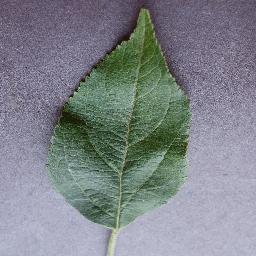

In [51]:
img

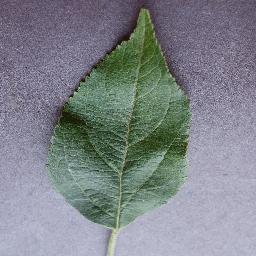

In [52]:
img=image.load_img('/content/drive/MyDrive/IBM PROJECT/fruit-dataset/fruit-dataset/test/Apple___healthy/0adc1c5b-8958-47c0-a152-f28078c214f1___RS_HL 7825.JPG')
img

In [53]:
x=image.img_to_array(img)

In [54]:
x

array([[[ 92.,  79.,  99.],
        [ 91.,  78.,  98.],
        [100.,  87., 107.],
        ...,
        [ 98.,  89., 108.],
        [ 92.,  83., 102.],
        [105.,  96., 115.]],

       [[ 99.,  86., 106.],
        [ 99.,  86., 106.],
        [ 95.,  82., 102.],
        ...,
        [ 93.,  84., 103.],
        [ 82.,  73.,  92.],
        [ 89.,  80.,  99.]],

       [[ 85.,  72.,  92.],
        [105.,  92., 112.],
        [106.,  93., 113.],
        ...,
        [ 97.,  88., 107.],
        [ 83.,  74.,  93.],
        [ 86.,  77.,  96.]],

       ...,

       [[173., 176., 195.],
        [172., 175., 194.],
        [170., 173., 192.],
        ...,
        [182., 183., 201.],
        [181., 182., 200.],
        [178., 179., 197.]],

       [[173., 176., 195.],
        [170., 173., 192.],
        [168., 171., 190.],
        ...,
        [183., 184., 202.],
        [181., 182., 200.],
        [182., 183., 201.]],

       [[172., 175., 194.],
        [169., 172., 191.],
        [166., 1

In [55]:
x=np.expand_dims(x,axis=0)

In [56]:
x

array([[[[ 92.,  79.,  99.],
         [ 91.,  78.,  98.],
         [100.,  87., 107.],
         ...,
         [ 98.,  89., 108.],
         [ 92.,  83., 102.],
         [105.,  96., 115.]],

        [[ 99.,  86., 106.],
         [ 99.,  86., 106.],
         [ 95.,  82., 102.],
         ...,
         [ 93.,  84., 103.],
         [ 82.,  73.,  92.],
         [ 89.,  80.,  99.]],

        [[ 85.,  72.,  92.],
         [105.,  92., 112.],
         [106.,  93., 113.],
         ...,
         [ 97.,  88., 107.],
         [ 83.,  74.,  93.],
         [ 86.,  77.,  96.]],

        ...,

        [[173., 176., 195.],
         [172., 175., 194.],
         [170., 173., 192.],
         ...,
         [182., 183., 201.],
         [181., 182., 200.],
         [178., 179., 197.]],

        [[173., 176., 195.],
         [170., 173., 192.],
         [168., 171., 190.],
         ...,
         [183., 184., 202.],
         [181., 182., 200.],
         [182., 183., 201.]],

        [[172., 175., 194.],
       

In [58]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [59]:
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']

In [64]:
index[index[0]]

TypeError: ignored

In [63]:
img=image.load_img('/content/drive/MyDrive/IBM PROJECT/fruit-dataset/fruit-dataset/test/Peach___healthy/0a2ed402-5d23-4e8d-bc98-b264aea9c3fb___Rutg._HL 2471.JPG',target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']
index[y[0]]

'Apple___Black_rot'

In [65]:
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from flask import Flask,render_template,request

In [ ]:
app=Flask(__name__)

model=load_model("fruit.h5")

@app.route('/')
def index():
    return render_template("index.html")

@app.route('/predict',methods=['GET','POST'])
def upload():
    if request.method=='POST':
        f=request.files['image']
        basepath=os.path.dirname('__file__')
        filepath=os.path.join(basepath,'uploads',f.filename)
        f.save(filepath)
        img=image.load_img(filepath,target_size=(128,128))
        x=image.img_to_array(img)
        x=np.expand_dims(x,axis=0)
        pred=np.argmax(model.predict(x),axis=1)
        index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']
        text="The Classified Fruit disease is : " +str(index[pred[0]])
    return text
if __name__=='__main__':
    app.run(debug=False)